
*** a) Dataframe iris.csv:
         - Ma trận iris (150, 5) :
   sepal_width  sepal_length  petal_length  petal_width species
0          3.5           5.1           1.4          0.2  setosa
1          3.0           4.9           1.4          0.2  setosa
2          3.2           4.7           1.3          0.2  setosa
3          3.1           4.6           1.5          0.2  setosa
4          3.6           5.0           1.4          0.2  setosa

         - Ma trận X (150, 4) :
         - 4 cột đầu tiên:
    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

*** b) Phân tích SVD:
         - Ma trận U (150, 150) :
 [[-6.16171172e-02  1.29969428e-01 -5.58364155e-05 ... -9.34637342e-02
  -9.60224157e-02 -8.0992290

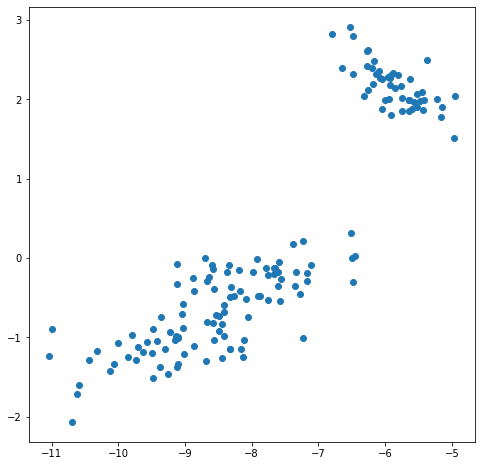

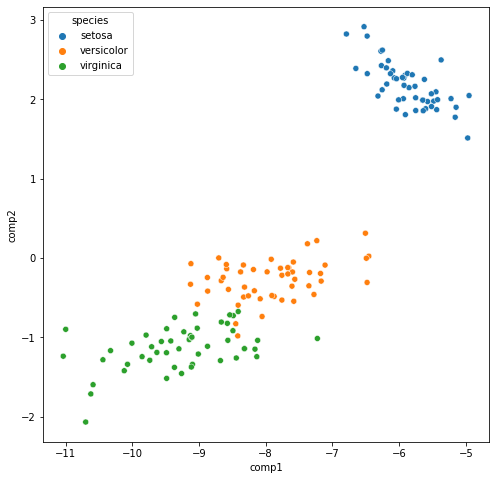

In [12]:
"""=============================================================================
   Ex4: SVD Demensionality Reduction
   Câu 1: 
      a) Cho tập tin iris.csv, đọc dữ liệu ra dataframe và chỉ lấy 4 cột đầu
      b) Phân tích SVD: U, s, VT từ dataframe, 
      c) Giảm chiều còn 2 components
      d) Trực quan hóa dữ liệu sau khi giảm chiều, có luôn cột 5 (species) 
============================================================================="""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## a) Đọc tập tin iris vào dataframe
folder = 'Data/Bai 2/'
iris   = pd.read_csv('../Data/B2/iris2.csv')
print('\n*** a) Dataframe iris.csv:')
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
print('         - Ma trận iris', iris.shape, ':')
print(iris.head())
print('\n         - Ma trận X', X.shape, ':')
print('         - 4 cột đầu tiên:\n', X.head())

## b) Phân tích SVD: U, s, VT
U, s, VT = np.linalg.svd(X)

print('\n*** b) Phân tích SVD:')
print('         - Ma trận U', U.shape, ':\n', U)
print('\n         - Eigenvalues:', s)
print('\n         - Ma trận VT', VT.shape, ':\n', VT)

## c) Giảm chiều còn 2 components
if (X.shape[0] == X.shape[1]):
    S = np.diag(s)
else:
    S = np.zeros_like(X)
    S[:X.shape[1], :X.shape[1]] = np.diag(s)
    print('\n',np.diag(S))

print('\n*** c) NEW dataframe (using only the first two components):')
## Chỉ sử dụng 2 components: S(n,  2); VT(2, n)
n_components = 2
S  =  S[:, :n_components]
VT = VT[:n_components, :]

## d) Trực quan hóa dữ liệu sau khi giảm chiều, có luôn cột 5 (species)
##    - Cột thứ 5 (species) chứa các giá trị: setosa, versicolor, virginica
##    - PCA: Chiếu vào không gian mới  
##      T_s1 = U.S = U.S.VT.V = X.V = T_s2
T_s1 = U.dot(S)
print(T_s1[0:5])

T_s2 = X.dot(VT.T)
print(T_s2[0:5])

## Visualization
## T_s2 có 2 columns, đặt tên là comp1, comp2
T_s2.columns = ["comp1", "comp2"]
## Bổ sung cột [iris.species] vào T_s2 --> T_s2(comp1, comp2, species)
T_s2["species"] = iris['species']

print('         - U.S', T_s2.shape, ': \n', U)
print(T_s2.head(10))

plt.figure(figsize = (8, 8))
plt.scatter(T_s2["comp1"], T_s2["comp2"])
plt.show()

plt.figure(figsize=(8, 8))
sns.scatterplot(x = "comp1", y = "comp2", data = T_s2, hue = "species")
plt.show()


In [13]:
"""=============================================================================
Ex4: SVD Demensionality Reduction
    Câu 2: 
        a) Tải dữ liệu digits từ dataset của sklearn
        b) Sử dụng TruncatedSVD để giảm chiều dữ liệu xuống 10 components
        c) Trực quan hóa dữ liệu sau khi giảm chiều
https://chrisalbon.com/machine_learning/feature_engineering/dimensionality_reduction_on_sparse_feature_matrix/
============================================================================="""

from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets

## a) Tải dữ liệu digits từ dataset của sklearn
digits = datasets.load_digits()
print('         - Matrix X', digits.data.shape, ': \n', digits.data, '\n')

## Standardize the feature matrix
X = digits.data

## Make sparse matrix
X_sparse = csr_matrix(X)
print('         - Sparse matrix', X_sparse.shape, ': \n', X_sparse, '\n')

## b) Phân tích Truncated SVD với k = 10: U, s, VT
tsvd = TruncatedSVD(n_components = 10)

## Conduct TSVD on sparse matrix
X_sparse_tsvd = tsvd.fit(X_sparse).transform(X_sparse)

## Show results
print('Original number of features:', X_sparse.shape[1])
print('Reduced  number of features:', X_sparse_tsvd.shape[1])

print('         - X[0]: \n', X[0], '\n')
print('         - X[0]: \n', X_sparse_tsvd[0], '\n')

## View Percent Of Variance Explained By New Features
# Sum of 10 components' explained variance ratios
tsvd.explained_variance_ratio_[0:10].sum()

## 73% with 10 components

         - Matrix X (1797, 64) : 
 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] 

         - Sparse matrix (1797, 64) : 
   (0, 2)	5.0
  (0, 3)	13.0
  (0, 4)	9.0
  (0, 5)	1.0
  (0, 10)	13.0
  (0, 11)	15.0
  (0, 12)	10.0
  (0, 13)	15.0
  (0, 14)	5.0
  (0, 17)	3.0
  (0, 18)	15.0
  (0, 19)	2.0
  (0, 21)	11.0
  (0, 22)	8.0
  (0, 25)	4.0
  (0, 26)	12.0
  (0, 29)	8.0
  (0, 30)	8.0
  (0, 33)	5.0
  (0, 34)	8.0
  (0, 37)	9.0
  (0, 38)	8.0
  (0, 41)	4.0
  (0, 42)	11.0
  (0, 44)	1.0
  :	:
  (1796, 27)	16.0
  (1796, 28)	16.0
  (1796, 29)	10.0
  (1796, 34)	12.0
  (1796, 35)	15.0
  (1796, 36)	15.0
  (1796, 37)	12.0
  (1796, 41)	4.0
  (1796, 42)	16.0
  (1796, 43)	6.0
  (1796, 44)	4.0
  (1796, 45)	16.0
  (1796, 46)	6.0
  (1796, 49)	8.0
  (1796, 50)	16.0
  (1796, 51)	10.0
  (1796, 52)	8.0
  (1796, 53)	16.0
  (1796, 54)	8.0
  (1796, 57)	1.0
  (1796, 58)	8.0
 

0.7324265033211741